# Demographic and Behavioral Characteristics Among HIV Incident Cases Diagnosed Since 2016 – Illinois
- This Table represents all new diagnoses with HIV regardless of the stage of the disease [HIV (non-AIDS) or AIDS], and also is referred    to as “HIV infection” or “HIV disease.”
- The Table divides the patients on different Ethics/Ethnicity and categorises them evenly
- This table contains 8 columns.
  1. Cumulative cases Diagnosed Since 2016 - Race/Ethnicity
  2. Total Cases
  3. Percent of Total Cases
  4. Case rate
  5. Total Dealths
  6. Male Cases
  7. percent of Male Cases
  8. Male Case Rate
- using selenium for webscraping I am going to extract the table data save it in a csv format.
- Perform data cleaning to remove unwanted columns
- Perform Extrapolatory Data Analysis to find and drive Insight on the data
- finally perform Visualization on the data to find and undestand the data for better storytelling

In [1]:
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
plt.style.use('seaborn-v0_8-whitegrid')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [24]:
driver = webdriver.Chrome()
driver.maximize_window
driver.get(
    url="https://dph.illinois.gov/topics-services/diseases-and-conditions/hiv-aids/hiv-surveillance/update-reports/2023/february.html")
wait = WebDriverWait(driver, 10)
Table = wait.until(EC.presence_of_element_located((By.XPATH, "(//table[@id='DataTables_Table_12'])[1]")))

# getting the number of rows
Rows = Table.find_elements(By.XPATH, ".//tbody/tr")
Rows_Count = len(Rows)
print(f"Row Count: {Rows_Count}")

data = []
for _ in Rows:
    cells = _.find_elements(By.XPATH, ".//td")
    Row = [cell.text for cell in cells]
    data.append(Row)

print()
for _ in data:
    print(_)

# saving the data on a csv format
with open("Hiv and Aids Demographics and Behavioral Characteristics.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    if data:
        writer.writerow(['Cumulative cases Diagnosed Since 2016', 'Total Cases', 'Percent of Total Cases',
                        'Case rate', 'Total Deaths', 'Male Cases', 'Percent of Male Cases', 'Male Case Rate', 
                         'Female Cases', 'Percent Of Female Cases', 'Female Case Rate'])
        writer.writerows(data)

print()
print('Data saved to csv!')
    
time.sleep(10)
driver.quit()

Row Count: 6

['Total', '9508', '100.00%', '10.3', '195', '7864', '100.00%', '17.36', '', '', '']
['White, non-Hispanic', '1981', '20.84%', '3.41', '63', '1726', '21.95%', '6.06', '', '', '']
['Black, non-Hispanic', '4510', '47.43%', '34.32', '98', '3456', '43.95%', '56.18', '', '', '']
['Hispanic, all races', '2233', '23.49%', '14.83', '25', '2038', '25.92%', '26.22', '', '', '']
['Other', '601', '6.32%', '10.16', '8', '489', '6.22%', '17.07', '', '', '']
['Unknown', '183', '1.92%', '', '1', '155', '1.97%', '', '', '', '']

Data saved to csv!


In [128]:
df = pd.read_csv('February 2023 HIV Surveillance Update Report.csv')
dfCopy = df.copy()
dfCopy

,Cumulative Cases Diagnosed Since 2016,Total Cases,Percent of Total Cases,Case Rate,Total Deaths,Male Cases,Percent of Male Cases,Male Case Rate,Female Cases,Percent of Female Cases,Female Case Rate
0,Total,9508,100.00%,10.30,195,7864,100.00%,17.36,1644,100.00%,3.50
1,"White, non-Hispanic",1981,20.84%,3.41,63,1726,21.95%,6.06,255,15.51%,0.86
2,"Black, non-Hispanic",4510,47.43%,34.32,98,3456,43.95%,56.18,1054,64.11%,15.08
3,"Hispanic, all races",2233,23.49%,14.83,25,2038,25.92%,26.22,195,11.86%,2.68
4,Other,601,6.32%,10.16,8,489,6.22%,17.07,112,6.81%,3.67
5,Unknown,183,1.92%,NaN,1,155,1.97%,NaN,28,1.70%,NaN


# Extrapolatory Data Analysis 
- we are performing EDA on the data to remove, identify outliers on the data.
- Find insight on the data by performing data distribution.
- Cleaning, removing duplicates and handling null values
- Lastly performing visualization on the data to
  1) Get a better storytelling
  2) Find correlation on the numerical data

In [129]:
# No of rows, columns
rows, columns = dfCopy.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 6, Columns: 11


In [130]:
dfCopy.describe()

,Total Cases,Case Rate,Total Deaths,Male Cases,Male Case Rate,Female Cases,Female Case Rate
count,6.000000,5.000000,6.000000,6.000000,5.0000,6.000000,5.000000
mean,3169.333333,14.604000,65.000000,2621.333333,24.5780,548.000000,5.158000
std,3457.729351,11.751074,73.400272,2826.792081,19.0576,652.411833,5.657351
min,183.000000,3.410000,1.000000,155.000000,6.0600,28.000000,0.860000
25%,946.000000,10.160000,12.250000,798.250000,17.0700,132.750000,2.680000
50%,2107.000000,10.300000,44.000000,1882.000000,17.3600,225.000000,3.500000
75%,3940.750000,14.830000,89.250000,3101.500000,26.2200,854.250000,3.670000
max,9508.000000,34.320000,195.000000,7864.000000,56.1800,1644.000000,15.080000


In [134]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Cumulative Cases Diagnosed Since 2016  6 non-null      object 
 1   Total Cases                            6 non-null      int64  
 2   Percent of Total Cases                 6 non-null      float64
 3   Case Rate                              5 non-null      float64
 4   Total Deaths                           6 non-null      int64  
 5   Male Cases                             6 non-null      int64  
 6   Percent of Male Cases                  6 non-null      float64
 7   Male Case Rate                         5 non-null      float64
 8   Female Cases                           6 non-null      int64  
 9   Percent of Female Cases                6 non-null      float64
 10  Female Case Rate                       5 non-null      float64
dtypes: float64

In [132]:
# getting null values
dfCopy.isna().sum()

Cumulative Cases Diagnosed Since 2016    0
Total Cases                              0
Percent of Total Cases                   0
Case Rate                                1
Total Deaths                             0
Male Cases                               0
Percent of Male Cases                    0
Male Case Rate                           1
Female Cases                             0
Percent of Female Cases                  0
Female Case Rate                         1
dtype: int64

In [133]:
# converting object columns to float
# dfCopy['Percent of Female Cases'] = [float(str(i).replace("%","")) for i in dfCopy['Percent of Female Cases']]
# dfCopy['Percent of Total Cases'] = [float(str(i).replace("%","")) for i in dfCopy['Percent of Total Cases']]
dfCopy['Percent of Male Cases'] = [float(str(x).replace("%","")) for x in dfCopy['Percent of Male Cases']]

In [144]:
# fillling the null values
# dfCopy['Case Rate'] = dfCopy['Case Rate'].fillna(dfCopy['Case Rate'].ffill())
# dfCopy['Male Case Rate'] = dfCopy['Male Case Rate'].fillna(dfCopy['Male Case Rate'].ffill())
dfCopy['Female Case Rate'] = dfCopy['Female Case Rate'].fillna(dfCopy['Female Case Rate'].ffill())

In [151]:
# renaming the columns
dfCopy  = dfCopy.rename(
    columns={"Cumulative Cases Diagnosed 2016":"Cumulative Cases Diagnosed in 2016",
            "Percent of Total Cases":"Total Cases %","Percent of Male Cases":"Male Cases %",
            "Percent of Female Cases":"Female Cases %"})

In [152]:
dfCopy

,Cumulative Cases Diagnosed in 2016,Total Cases,Total Cases %,Case Rate,Total Deaths,Male Cases,Male Cases %,Male Case Rate,Female Cases,Female Cases %,Female Case Rate
0,Total,9508,100.00,10.30,195,7864,100.00,17.36,1644,100.00,3.50
1,"White, non-Hispanic",1981,20.84,3.41,63,1726,21.95,6.06,255,15.51,0.86
2,"Black, non-Hispanic",4510,47.43,34.32,98,3456,43.95,56.18,1054,64.11,15.08
3,"Hispanic, all races",2233,23.49,14.83,25,2038,25.92,26.22,195,11.86,2.68
4,Other,601,6.32,10.16,8,489,6.22,17.07,112,6.81,3.67
5,Unknown,183,1.92,10.16,1,155,1.97,17.07,28,1.70,3.67


In [160]:
# checking for duplicates on each column
dfCopy.loc[dfCopy.duplicated(subset=['Total Cases %'])]

,Cumulative Cases Diagnosed in 2016,Total Cases,Total Cases %,Case Rate,Total Deaths,Male Cases,Male Cases %,Male Case Rate,Female Cases,Female Cases %,Female Case Rate


In [153]:
# saving file to the csv 
dfCopy.to_csv('February 2023 HIV Surveillance Update Report.csv')

# Visualization
1) we are plotting and getting a better insight on the data
2) find the correlation between the numerical values
3) plot to see trend on the dataset

In [176]:
relation = round(dfCopy[dfCopy.columns[1:]].corr(),2)

In [177]:
relation

,Total Cases,Total Cases %,Case Rate,Total Deaths,Male Cases,Male Cases %,Male Case Rate,Female Cases,Female Cases %,Female Case Rate
Total Cases,1.00,1.00,0.20,0.98,1.00,1.00,0.20,0.97,0.97,0.21
Total Cases %,1.00,1.00,0.20,0.98,1.00,1.00,0.20,0.97,0.97,0.21
Case Rate,0.20,0.20,1.00,0.16,0.16,0.16,1.00,0.37,0.37,0.97
Total Deaths,0.98,0.98,0.16,1.00,0.98,0.98,0.15,0.97,0.97,0.21
Male Cases,1.00,1.00,0.16,0.98,1.00,1.00,0.16,0.96,0.96,0.16
Male Cases %,1.00,1.00,0.16,0.98,1.00,1.00,0.16,0.96,0.96,0.16
Male Case Rate,0.20,0.20,1.00,0.15,0.16,0.16,1.00,0.36,0.36,0.96
Female Cases,0.97,0.97,0.37,0.97,0.96,0.96,0.36,1.00,1.00,0.41
Female Cases %,0.97,0.97,0.37,0.97,0.96,0.96,0.36,1.00,1.00,0.41
Female Case Rate,0.21,0.21,0.97,0.21,0.16,0.16,0.96,0.41,0.41,1.00


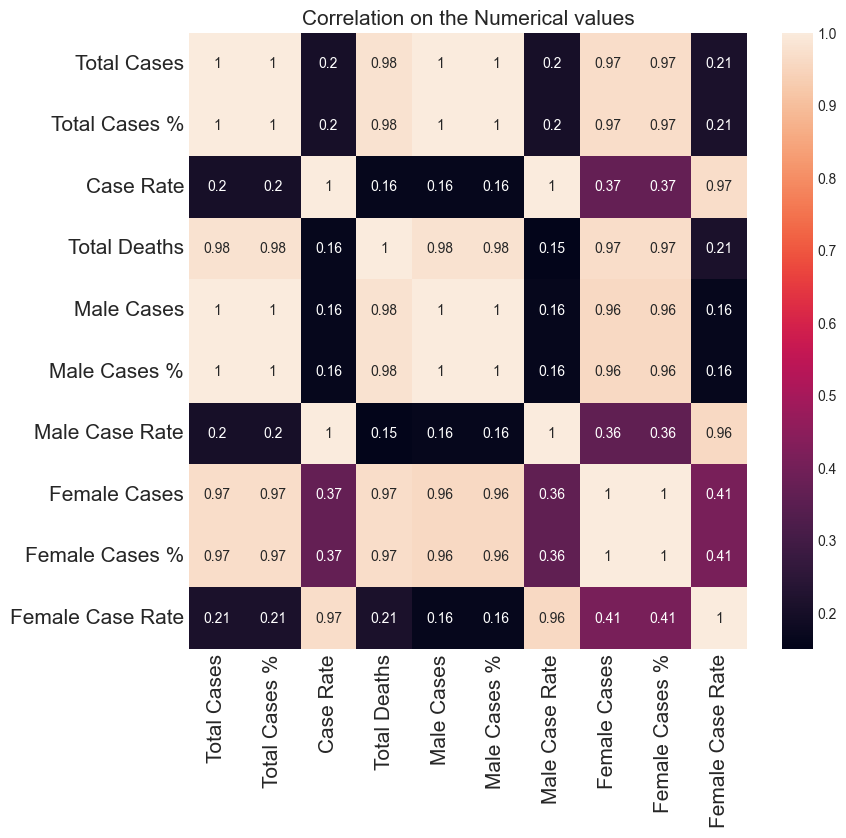

In [190]:
# using heatmap to plot the correlation
plt.subplots(figsize=(9,8))
fig = sns.heatmap(data=relation, annot=True)
fig.set_title(label="Correlation on the Numerical values", fontsize=15)
fig.tick_params(axis='x', labelsize=15)
fig.tick_params(axis='y', labelsize=15)
plt.show()

In [ ]:
# line chart
group = 